# **VALUE AT RISK**

Volatility in financial markets exposes investments to market risk, which can arise from various factors such as political dynamics, changes in economic policies, exchange rate fluctuations, or unexpected natural disasters. To manage such risks, derivatives are extensively utilized. A derivative is a financial instrument whose value is derived from an underlying variable. Derivatives serve two primary purposes: hedging, which provides insurance against adverse price movements, and speculation, which involves betting on future market movements. However, the increasing market volatility has led to a higher demand for derivative contracts as tools for managing market risk, which in turn has created new challenges.

When trading derivatives, two parties are involved: one seeks to manage risk through derivative acquisition, while the other may speculate on future events to profit from the trade. It's important to note that derivatives themselves are exposed to market risk since their value depends on the underlying asset's performance. If not managed properly, derivatives can lead to substantial losses.

In the early 1990s, the rapid growth of off-balance sheet derivatives markets raised concerns. This concern led to the creation of the G-30 Report, which recommended that dealers holding derivative portfolios assess their risk using Value-at-Risk (VaR). VaR can be defined as an estimate of the maximum potential loss in the value of a portfolio or financial position over a specified time period, with a certain level of confidence. In simpler terms, VaR provides a statement like, "With X% confidence, the portfolio is not expected to incur losses exceeding V dollars in the next N days," where X represents the confidence level, N represents the time period, and V is the VaR value. Several methodologies exist for calculating VaR, and the choice of methodology depends on factors such as the complexity of the portfolio and the accuracy required. VaR methodologies can be classified into two broad categories:

1. **Historical Simulation:**

   Historical Simulation falls under the category of VaR methodologies that rely on historical data to estimate potential future losses. This methodology does not involve modelling complex statistical distributions or making assumptions about the underlying data distribution. Instead, Historical Simulation is based on the actual historical price or return data of the portfolio or assets. Within Historical Simulation, the primary methods include:

   - **Simple Historical Simulation:** This method selects a specific percentile of historical returns to estimate VaR. For example, for a 95% confidence level, one would use the 5th percentile (worst-performing) historical return as the VaR estimate.
<br><br>

2. **Model Building Approaches:**

   Model Building Approaches involve the use of statistical models and assumptions to estimate VaR. These methodologies typically require specifying a probability distribution for asset returns or simulating future returns based on various assumptions. Within Model Building Approaches, the primary methods include:

   - **Parametric VaR:** Parametric VaR assumes that asset returns follow a specific probability distribution, such as the normal distribution. VaR is calculated based on parameters like mean and standard deviation.

   - **Delta-Normal VaR:** Delta-Normal VaR is often used for options and derivatives. It approximates changes in portfolio value based on small changes (delta) in underlying asset prices, assuming a normal distribution for these changes.

   - **Delta-Gamma-Normal VaR:** Delta-Gamma-Normal VaR builds upon Delta-Normal VaR by incorporating second-order sensitivity, known as gamma, in addition to delta. It is particularly useful for portfolios with complex options strategies and nonlinear payoffs, providing a more accurate representation of risk.

   - **Non-Parametric Approaches:** Non-Parametric methods, such as the Cornish-Fisher expansion, aim to improve the accuracy of VaR calculations by adjusting for non-normality and tail risk without making strict distributional assumptions.

   - **Monte Carlo Simulation:** Monte Carlo simulation involves generating a large number of random scenarios for asset returns based on statistical distributions and assumptions. VaR is estimated by aggregating the outcomes of these simulations. This approach is highly flexible and can handle complex portfolios and dependencies between assets.

##### **Import Packages**

In [1975]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm

np.random.seed(42)

## **1. Historical Simulation**

##### **Data Preparation Function**

In [1976]:
def dataPrep(tickers, start, end):
    """Funtion for Data Preparation

    Args:
        tickers (List)  : list of Asset Tickers.
        start (String)  : Start Date (Format: 'YYYY-MM-DD').
        end (String)    : End Date   (Format: 'YYYY-MM-DD').

    Returns:
        returns (Series or DataFrame)   : Daily Returns of Asset(s).
        e (Float or Series)             : Daily Mean Return (Expected Return) of Asset(s).
        std (Float or Series)           : Daily Standard Deviation (Volatility) of Asset(s).
        V (DataFrame)                   : Daily Variance-Covariance Matrix of Asset Returns.
    """
    # Get Asset(s) Adjusted Close Data
    data = yf.download(tickers, start, end, rounding=True)['Adj Close']
    
    # Get Daily Returns of Asset(s)
    returns = data.pct_change().dropna()
    
    # Single Asset Portfolio
    if isinstance(returns, pd.Series):
        # Get Daily Mean Return and Standard Deviation of the Asset
        e = returns.mean()
        std = returns.std()
        return returns, e, std

    # Multiple Assets Portfolio
    elif isinstance(returns, pd.DataFrame):
        # Get Daily Mean Return and Standard Deviation and Variance-Covariance Matrix of the Assets
        e = returns.mean()
        std = returns.std()
        V = returns.cov()
        return returns, e, std, V

#### **1.1 Single Asset Case**

##### **Total Portfolio**

In [1977]:
portfolioValue = 1000000

In [1978]:
portfolioList = ['MSFT']

##### **Portfolio Data**

In [1979]:
returns, e, std = dataPrep(tickers = portfolioList, start = '2020-09-20', end  = '2023-09-20')

[*********************100%***********************]  1 of 1 completed


##### **Daily Returns of the Asset**

In [1980]:
returns

Date
2020-09-22    0.024096
2020-09-23   -0.032940
2020-09-24    0.012959
2020-09-25    0.022805
2020-09-28    0.007762
                ...   
2023-09-13    0.012931
2023-09-14    0.007856
2023-09-15   -0.025037
2023-09-18   -0.003513
2023-09-19   -0.001246
Name: Adj Close, Length: 753, dtype: float64

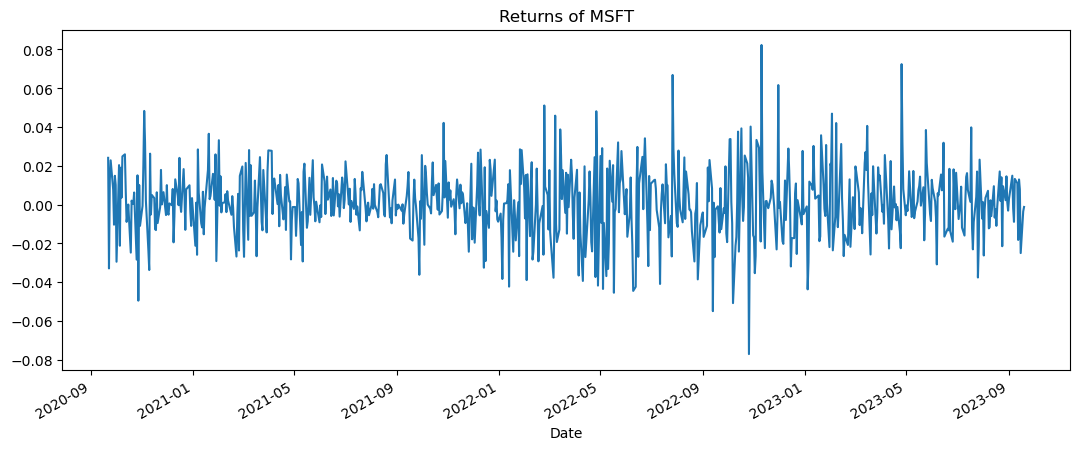

In [1981]:
returns.plot(figsize = (13,5))
plt.title(f'Returns of {portfolioList[0]}');

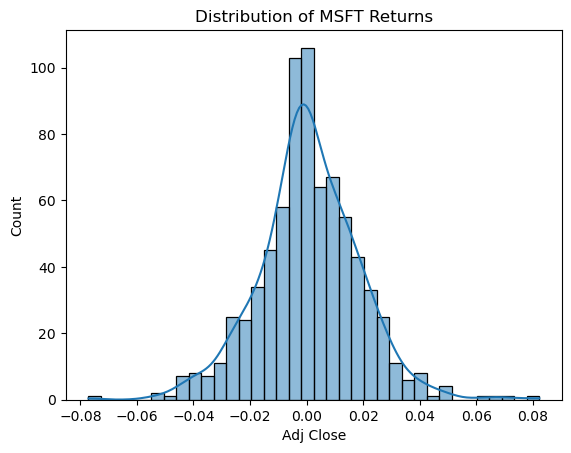

In [1982]:
sns.histplot(returns, kde = True)
plt.title(f'Distribution of {portfolioList[0]} Returns');

##### **Daily Mean Return (Expected Return) of the Asset**

In [1983]:
e

0.0008380170966734542

##### **Daily Standard Deviation (Volatility) of the Asset**

In [1984]:
std

0.0178543087882196

##### **Value-at-Risk**

**Distribution of Portfolio Value**

In [1985]:
portfolioDist = returns * portfolioValue
portfolioDist

Date
2020-09-22    24095.774362
2020-09-23   -32940.360610
2020-09-24    12959.073913
2020-09-25    22805.420712
2020-09-28     7761.902408
                  ...     
2023-09-13    12930.644724
2023-09-14     7855.740046
2023-09-15   -25036.905816
2023-09-18    -3512.809642
2023-09-19    -1245.973379
Name: Adj Close, Length: 753, dtype: float64

**Confidence Level**

In [1986]:
cl = 95

**Alpha**

In [1987]:
alpha = 1 - cl/100
alpha

0.050000000000000044

**Historical Percentage VaR**

In [1988]:
pct_VaR = np.quantile(returns, alpha)
print(f'{round(-1 * pct_VaR * 100, 2)}%')

2.84%


**Insights:**
- It implies that the portfolio will not lose more than 2.84% in the next day.

**Historical Absolute VaR**

In [1989]:
abs_VaR = np.quantile(portfolioDist, alpha)
print(f'${round(-1 * abs_VaR, 2)}')

$28392.54


**Insights:**

- 1-Day 95% VaR is equal to $28,392.54
- It implies that, with 95% certainty, the value of portfolio will not lose more than $28,392.54 in the next day.

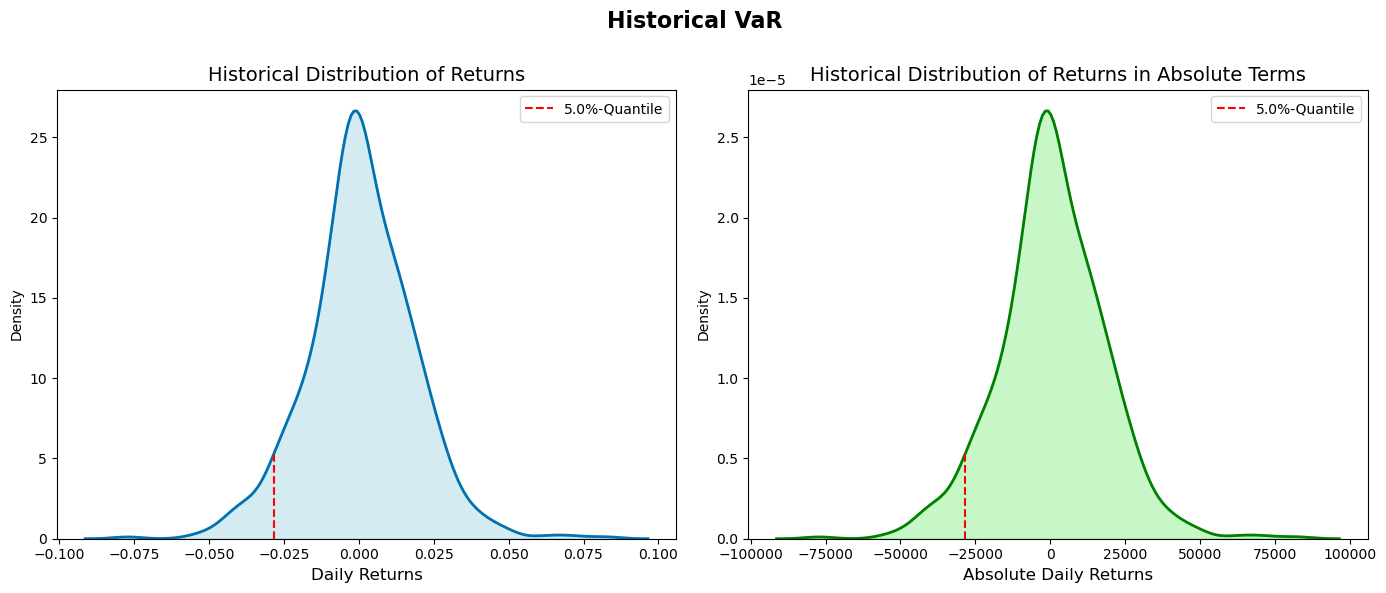

In [1990]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Subplot 1: Daily Returns
plt.subplot(1, 2, 1)
# KDE plot for returns
ax = sns.kdeplot(returns, fill=False, color='#0072B2', linewidth=2)
x, y = ax.get_lines()[0].get_data()
xi = np.percentile(returns, 5)  # Coordinate to find the value on the KDE curve
yi = np.interp(xi, x, y)
sns.kdeplot(returns, fill=True, color='lightblue', alpha=0.5)
# Vertical line at 5th percentile
plt.vlines(x=xi, ymin=0, ymax=yi, color='red', linestyle='--', label= f'{np.round(alpha * 100, 0)}%-Quantile')
plt.xlabel('Daily Returns', fontsize=12)
plt.title('Historical Distribution of Returns', fontsize=14)
plt.legend(fontsize=10)

# Subplot 2: Absolute Daily Returns
plt.subplot(1, 2, 2)
# KDE plot for portfolioDist
ax = sns.kdeplot(portfolioDist, fill=False, color='green', linewidth=2)
x, y = ax.get_lines()[0].get_data()
xi = np.percentile(portfolioDist, 5)  # Coordinate to find the value on the KDE curve
yi = np.interp(xi, x, y)
sns.kdeplot(portfolioDist, fill=True, color='lightgreen', alpha=0.5)
# Vertical line at 5th percentile
plt.vlines(x=xi, ymin=0, ymax=yi, color='red', linestyle='--', label= f'{np.round(alpha * 100, 0)}%-Quantile')
plt.xlabel('Absolute Daily Returns', fontsize=12)
plt.title('Historical Distribution of Returns in Absolute Terms', fontsize=14)
plt.legend(fontsize=10)

# Add a super title
plt.suptitle('Historical VaR', fontsize=16, fontweight = 'bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

---

#### **1.2 Multi Asset Case**

##### **List of Portfolio**

In [1991]:
portfolioList = ['SPY', # Tracks the performance of the S&P 500 Index
                 'QQQ', # Tracks the performance of the NASDAQ-100 Index
                 'TLT', # Tracks long-term U.S. Treasury bonds
                 'GLD', # Tracks the price of gold bullion
                 'VNQ'  # Focuses on real estate investment trusts (REITs)
                ]

##### **Data Preparation**

In [1992]:
returns, e, std, V = dataPrep(tickers = portfolioList, start = '2020-09-20', end  = '2023-09-20')

[*********************100%***********************]  5 of 5 completed


##### **Returns of Assets**

In [1993]:
returns

,GLD,QQQ,SPY,TLT,VNQ
Date,,,,,
2020-09-22,-0.004846,0.018580,0.010169,-0.000781,0.012032
2020-09-23,-0.021606,-0.030539,-0.023173,0.001367,-0.030082
2020-09-24,0.003719,0.004665,0.002658,0.003771,0.005317
2020-09-25,-0.002850,0.023257,0.016161,0.000000,0.020567
2020-09-28,0.010061,0.020778,0.016604,-0.002785,0.020440
...,...,...,...,...,...
2023-09-13,-0.002310,0.003815,0.001170,-0.000213,-0.010896
2023-09-14,0.000508,0.008162,0.008630,-0.007241,0.018152
2023-09-15,0.006604,-0.017121,-0.012055,-0.006007,-0.003812


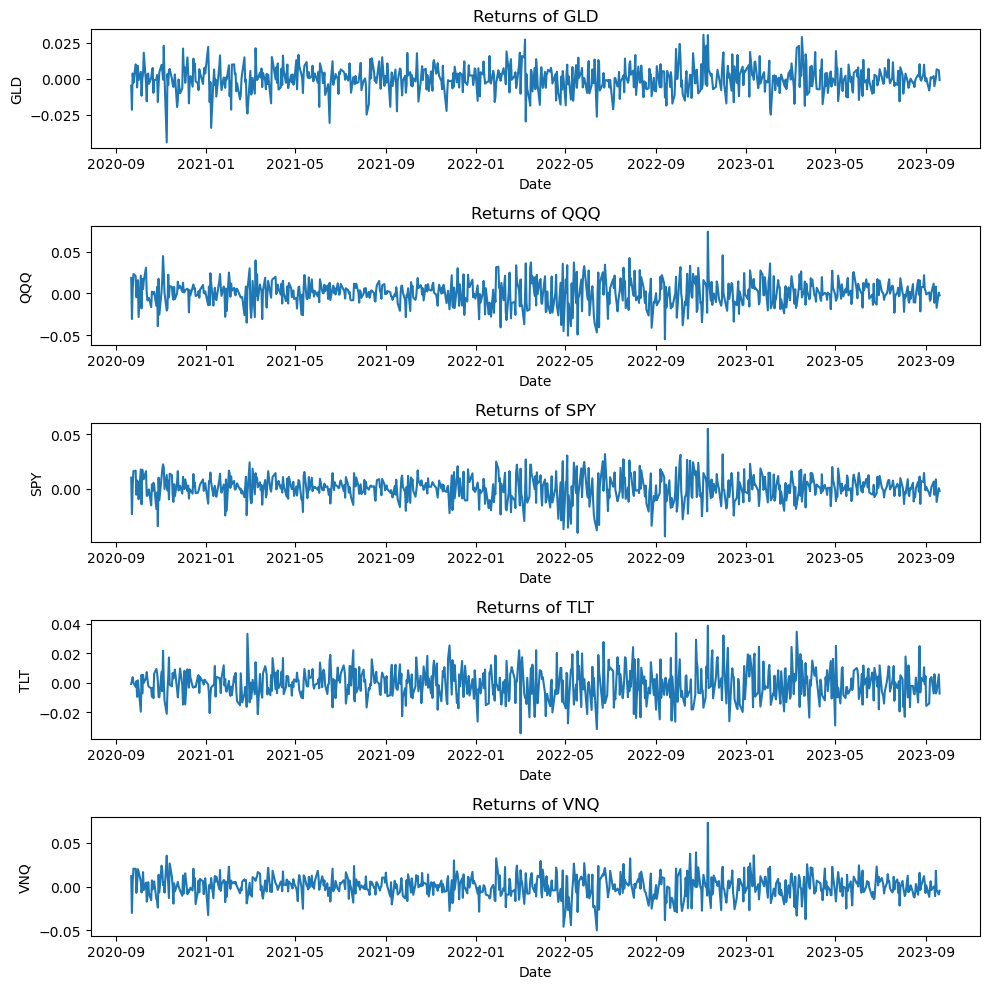

In [1994]:
plt.figure(figsize=(10,10))

for col in range(len(returns.columns)):

    plt.subplot(5,1, col+1)
    sns.lineplot(data=returns, x= returns.index, y=returns.columns[col])
    plt.title(f'Returns of {returns.columns[col]}')

plt.tight_layout()

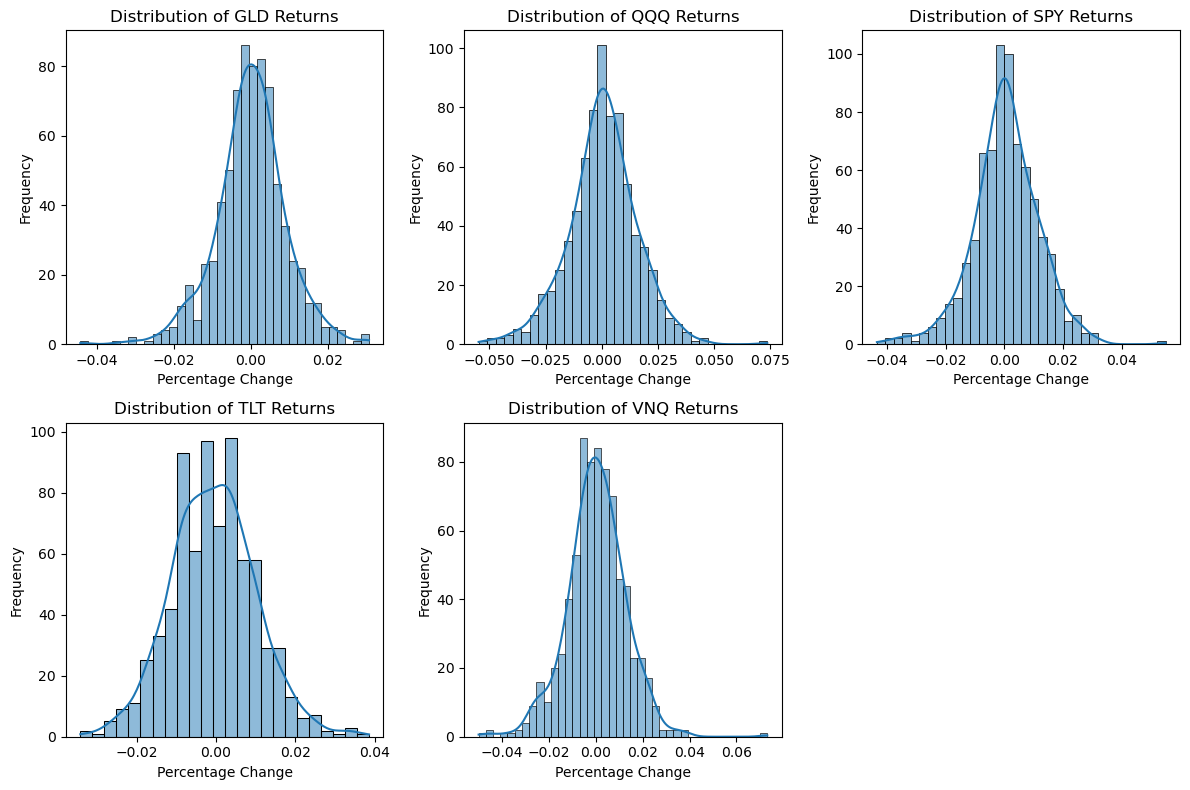

In [1995]:
plt.figure(figsize=(12,8))

for col in range(len(returns.columns)):

    plt.subplot(2,3, col+1)
    sns.histplot(data=returns, x=returns.columns[col], kde = True)
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {returns.columns[col]} Returns')

plt.tight_layout()

##### **Daily Mean Return (Expected Return) of Assets**

In [1996]:
e

GLD    0.000039
QQQ    0.000572
SPY    0.000526
TLT   -0.000618
VNQ    0.000275
dtype: float64

##### **Dailty Standard Deviation (Volatility) of Assets**

In [1997]:
std

GLD    0.009028
QQQ    0.015307
SPY    0.011296
TLT    0.010610
VNQ    0.012578
dtype: float64

##### **Value-at-Risk**

**Portfolio Value**

In [1998]:
portfolioValue

1000000

**Portfolio Weight**

In [1999]:
# Assume invest with equal weight
w = np.array([1/len(portfolioList)] * len(portfolioList))
w

array([0.2, 0.2, 0.2, 0.2, 0.2])

**Portfolio Returns**

In [2000]:
returns['portfolio'] = np.dot(returns, w)
returns

,GLD,QQQ,SPY,TLT,VNQ,portfolio
Date,,,,,,
2020-09-22,-0.004846,0.018580,0.010169,-0.000781,0.012032,0.007031
2020-09-23,-0.021606,-0.030539,-0.023173,0.001367,-0.030082,-0.020807
2020-09-24,0.003719,0.004665,0.002658,0.003771,0.005317,0.004026
2020-09-25,-0.002850,0.023257,0.016161,0.000000,0.020567,0.011427
2020-09-28,0.010061,0.020778,0.016604,-0.002785,0.020440,0.013020
...,...,...,...,...,...,...
2023-09-13,-0.002310,0.003815,0.001170,-0.000213,-0.010896,-0.001687
2023-09-14,0.000508,0.008162,0.008630,-0.007241,0.018152,0.005642
2023-09-15,0.006604,-0.017121,-0.012055,-0.006007,-0.003812,-0.006478


**Distribution of Portfolio Value**

In [2001]:
portfolioDist = returns.portfolio * portfolioValue
portfolioDist

Date
2020-09-22     7030.995561
2020-09-23   -20806.606599
2020-09-24     4025.803460
2020-09-25    11427.029507
2020-09-28    13019.612529
                  ...     
2023-09-13    -1686.938434
2023-09-14     5642.431432
2023-09-15    -6478.165789
2023-09-18      850.389555
2023-09-19    -3411.486160
Name: portfolio, Length: 753, dtype: float64

**Confidence Level**

In [2002]:
cl = 95
cl

95

**Alpha**

In [2003]:
alpha = 1 - cl/100
alpha

0.050000000000000044

**Percentage VaR**

In [2004]:
pct_VaR = np.quantile(returns['portfolio'], alpha)
print(f'{round(-1 * pct_VaR * 100, 2)}%')

1.37%


**Insights:**
- It implies that the value of portfolio will not lose more than 1.37% in the next day.

**Absolute VaR**

In [2005]:
abs_VaR = np.quantile(portfolioDist, alpha)
print(f'${round(-1 * abs_VaR, 2)}')

$13659.11


**Insights:**
- 1-Day 95% VaR is equal to $13,659.11.
- It implies that with 95% of confidence, the loss of portfolio value will not exceed $13,659.11 in the next day.

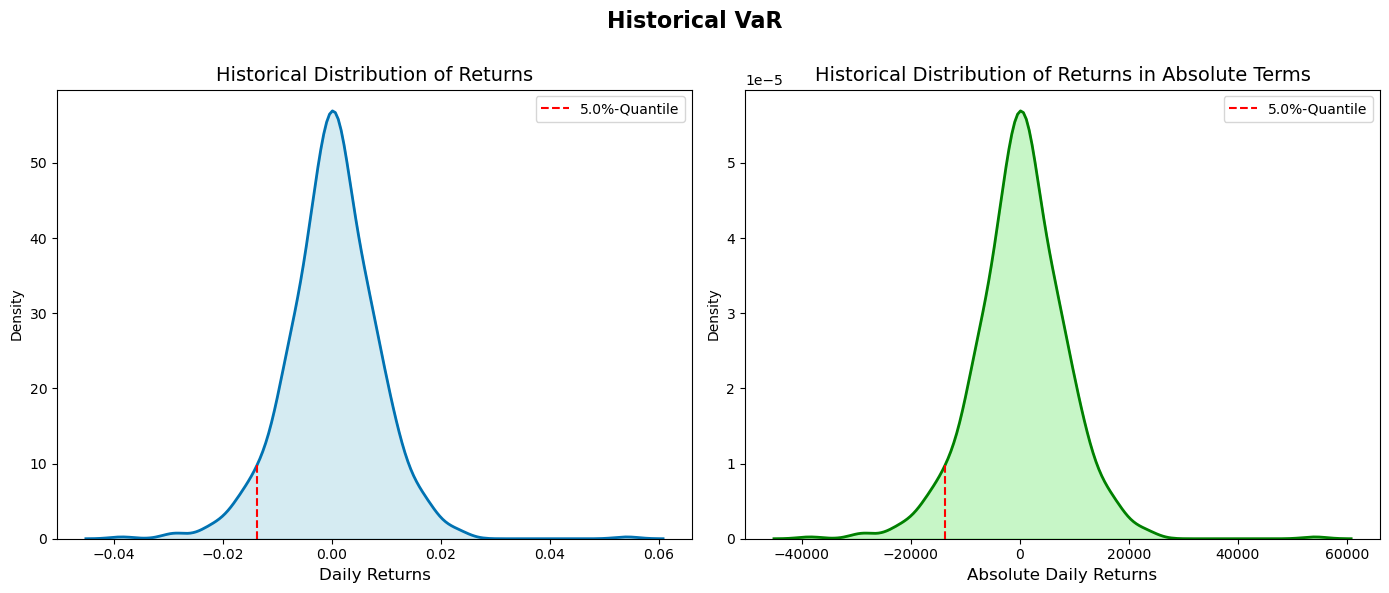

In [2006]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Subplot 1: Daily Returns
plt.subplot(1, 2, 1)
# KDE plot for returns
ax = sns.kdeplot(returns['portfolio'], fill=False, color='#0072B2', linewidth=2)
x, y = ax.get_lines()[0].get_data()
xi = np.percentile(returns['portfolio'], 5)  # Coordinate to find the value on the KDE curve
yi = np.interp(xi, x, y)
sns.kdeplot(returns['portfolio'], fill=True, color='lightblue', alpha=0.5)
# Vertical line at 5th percentile
plt.vlines(x=xi, ymin=0, ymax=yi, color='red', linestyle='--', label= f'{np.round(alpha * 100, 0)}%-Quantile')
plt.xlabel('Daily Returns', fontsize=12)
plt.title('Historical Distribution of Returns', fontsize=14)
plt.legend(fontsize=10)

# Subplot 2: Absolute Daily Returns
plt.subplot(1, 2, 2)
# KDE plot for portfolioDist
ax = sns.kdeplot(portfolioDist, fill=False, color='green', linewidth=2)
x, y = ax.get_lines()[0].get_data()
xi = np.percentile(portfolioDist, 5)  # Coordinate to find the value on the KDE curve
yi = np.interp(xi, x, y)
sns.kdeplot(portfolioDist, fill=True, color='lightgreen', alpha=0.5)
# Vertical line at 5th percentile
plt.vlines(x=xi, ymin=0, ymax=yi, color='red', linestyle='--', label= f'{np.round(alpha * 100, 0)}%-Quantile')
plt.xlabel('Absolute Daily Returns', fontsize=12)
plt.title('Historical Distribution of Returns in Absolute Terms', fontsize=14)
plt.legend(fontsize=10)

# Add a super title
plt.suptitle('Historical VaR', fontsize=16, fontweight = 'bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

---

## **2. Model Building Approach**

### **2.1 Parametric Approach**

#### **2.1.1 Single Asset Case**

##### **Total Portfolio**

In [2007]:
portfolioValue = 1000000

##### **List of Portfolio**

In [2008]:
portfolioList = ['MSFT']

##### **Data Preparation**

In [2009]:
returns, e, std = dataPrep(tickers = portfolioList, start = '2020-09-20', end  = '2023-09-20')

[*********************100%***********************]  1 of 1 completed


##### **Daily Returns of the Asset**

In [2010]:
returns

Date
2020-09-22    0.024096
2020-09-23   -0.032940
2020-09-24    0.012959
2020-09-25    0.022805
2020-09-28    0.007762
                ...   
2023-09-13    0.012931
2023-09-14    0.007856
2023-09-15   -0.025037
2023-09-18   -0.003513
2023-09-19   -0.001246
Name: Adj Close, Length: 753, dtype: float64

##### **Daily Mean Return (Expected Return) of the Asset**

In [2011]:
e

0.0008380170966734542

##### **Daily Standard Deviation (Volatility) of the Asset**

In [2012]:
std

0.0178543087882196

##### **Value-at-Risk**

**Confidence Level**

In [2013]:
cl = 95

**Alpha**

In [2014]:
alpha = 1 - cl/100
alpha

0.050000000000000044

**Time Horizon**

In [2015]:
# 1 day
t = 1

**Percentage VaR**

In [2016]:
pct_VaR = norm.ppf(alpha) * std * np.sqrt(t) - e * t
print(f'{round(-1 * pct_VaR * 100, 2)}%')

3.02%


**Insights:**
- It implies that the portfolio will not lose more than 3.02% in the next day.

**Absolute VaR**

In [2017]:
# Absolute VaR
abs_VaR = norm.ppf(alpha) * std * portfolioValue * np.sqrt(t) - e * portfolioValue * t
print(f'${round(-1 * abs_VaR, 2)}')

$30205.74


**Insights:**
- 1-Day 95% VaR is equal to $30,205.74.
- It implies that with 95% of confidence, the value of porfolio will not lose more than $30,205.74 in the next day.

---

#### **2.1.2 Multiple Assets**

##### **List of Portfolio**

In [2018]:
# List of the assets in the portfolio
portfolioList = ['SPY', # Tracks the performance of the S&P 500 Index
                 'QQQ', # Tracks the performance of the NASDAQ-100 Index
                 'TLT', # Tracks long-term U.S. Treasury bonds
                 'GLD', # Tracks the price of gold bullion
                 'VNQ'  # Focuses on real estate investment trusts (REITs)
                ]

##### **Data Preparation**

In [2019]:
returns, e, std, V = dataPrep(tickers = portfolioList, start = '2020-09-20', end  = '2023-09-20')

[*********************100%***********************]  5 of 5 completed


##### **Returns of Assets**

In [2020]:
returns

,GLD,QQQ,SPY,TLT,VNQ
Date,,,,,
2020-09-22,-0.004846,0.018580,0.010169,-0.000781,0.012032
2020-09-23,-0.021606,-0.030539,-0.023173,0.001367,-0.030082
2020-09-24,0.003719,0.004665,0.002658,0.003771,0.005317
2020-09-25,-0.002850,0.023257,0.016161,0.000000,0.020567
2020-09-28,0.010061,0.020778,0.016604,-0.002785,0.020440
...,...,...,...,...,...
2023-09-13,-0.002310,0.003815,0.001170,-0.000213,-0.010896
2023-09-14,0.000508,0.008162,0.008630,-0.007241,0.018152
2023-09-15,0.006604,-0.017121,-0.012055,-0.006007,-0.003812


##### **Daily Mean Return (Expected Return) of Assets**

In [2021]:
e

GLD    0.000039
QQQ    0.000572
SPY    0.000526
TLT   -0.000618
VNQ    0.000275
dtype: float64

##### **Daily Standard Deviation (Volatility) of Assets**

In [2022]:
std

GLD    0.009028
QQQ    0.015307
SPY    0.011296
TLT    0.010610
VNQ    0.012578
dtype: float64

##### **Variance-Covariance Matrix of Returns**

In [2023]:
V

,GLD,QQQ,SPY,TLT,VNQ
GLD,0.000082,0.000022,0.000016,0.000030,0.000021
QQQ,0.000022,0.000234,0.000161,0.000013,0.000121
SPY,0.000016,0.000161,0.000128,0.000001,0.000108
TLT,0.000030,0.000013,0.000001,0.000113,0.000015
VNQ,0.000021,0.000121,0.000108,0.000015,0.000158


##### **Portfolio Weight**

In [2024]:
w

array([0.2, 0.2, 0.2, 0.2, 0.2])

##### **Value-at-Risk**

**Daily Mean Return of the Portfolio**

In [2025]:
eP = np.dot(w.T, e)
eP

0.00015851294699652683

**Daily Variance of the Portfolio**

In [2026]:
varP = np.dot(np.dot(w.T, V), w)
varP

6.919905107356253e-05

**Daily Standard Deviation of the Portfolio**

In [2027]:
stdP = np.sqrt(varP)
stdP

0.008318596700980433

**Confidence Level**

In [2028]:
cl = 95

**Time Horizon**

In [2029]:
t = 1

**Percentage VaR**

In [2030]:
pct_VaR = norm.ppf(alpha) * stdP * np.sqrt(t) - eP * t
print(f'{round(-1 * pct_VaR * 100, 2)}%')

1.38%


**insights:**
- The portfolio value will not lose more than 1.38% in the next day.

**Absolute VaR**

In [2031]:
# Absolute VaR
abs_VaR = norm.ppf(alpha) * stdP * portfolioValue * np.sqrt(t) - eP * portfolioValue * t
print(f'${round(-1 * abs_VaR, 2)}')

$13841.39


**Insights:**
- 1-Day 95% VaR is equal to $13,841.28.
- It implies that with 95% of confidence, the value of portfolio will not lose more than $13,841.28 in the next day.

**Absolute VaR**

---

### **2.2 Parametric Approach: Case of Option Portfolio (Delta Normal Approach)**

#### **2.2.1 Single Option Position Portfolio**

##### **Option Valuation Function**

In [2032]:
def bs(S, K, t, r, sigma, option_type = 'c'):

    T = t / 252   # Daily to Yearly Time to Maturity

    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    try:
        if option_type == 'c':
            norm_d1 = norm.cdf(d1)
            norm_d2 = norm.cdf(d2)
            option_price = S * norm_d1 - K * np.exp(-r * T) * norm_d2
        elif option_type == 'p':
            norm_minus_d1 = norm.cdf(-d1)
            norm_minus_d2 = norm.cdf(-d2)
            option_price = K * np.exp(-r * T) * norm_minus_d2 - S * norm_minus_d1
        else:
            raise ValueError("Invalid option type. Use 'c' for call and 'p' for put.")
        
    # Option Greeks
        delta = norm_d1 if option_type == 'c' else -norm_minus_d1
        theta = ((-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm_d2)) / 252 if option_type == 'c' else \
                ((-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm_minus_d2)) / 252
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        vega  = S * np.sqrt(T) * norm.pdf(d1) * sigma
        rho   = K * T * np.exp(-r * T) * norm_d2 if option_type == 'c' else \
                -K * T * np.exp(-r * T) * norm_minus_d2
            
    except:
        print('Invalid Input, Check the Parameters')
        return None

    return option_price.round(4), delta.round(4), theta.round(4), gamma.round(4), vega.round(4), rho.round(4)

##### **Option Price and Greeks**

**Underlying Price**

In [2033]:
S = yf.download(tickers = ['MSFT'], start = '2020-09-20',end = '2023-09-20', rounding = True)['Adj Close'].tail(1).values[0]
S

[*********************100%***********************]  1 of 1 completed


328.65

**Annualized Standard Deviation**

In [2034]:
returns, e, std = dataPrep(tickers = ['MSFT'], start = '2000-09-20', end  = '2023-09-20')

annualized_std = std * np.sqrt(252)
annualized_std

[*********************100%***********************]  1 of 1 completed


0.298444428431454

**Option Price and Greeks**

In [2035]:
price, delta, theta, gamma, vega, rho = bs(S = S, K = S, t = 252, r = 0.05, sigma = annualized_std, option_type = 'c')

print(f'Option Price: {price}')
print(f'Delta: {delta}')
print(f'Theta: {theta}')
print(f'Gamma: {gamma}')
print(f'Vega: {vega}')
print(f'Rho: {rho}')

Option Price: 46.577
Delta: 0.6243
Theta: -0.1053
Gamma: 0.0039
Vega: 37.2151
Rho: 158.5946


##### **Delta Normal VaR**

**Option Delta**

In [2036]:
delta

0.6243

**Confidence Level**

In [2037]:
cl = 95

**Alpha**

In [2038]:
alpha = 1 - cl/100
alpha

0.050000000000000044

**Daily Standard Deviation**

In [2039]:
std

0.018800231852439092

**The Change of Risk Factor (Underlying Price)**

In [2040]:
dx = std * norm.ppf(alpha)
dx

-0.030923629550013036

**Insights:**
- With 95% confidence level, the daily percentage change of underlying asset will not exceed 3.09% in the next day.

**Percentage VaR**

In [2041]:
pct_VaR = delta * dx
pct_VaR

-0.019305621928073138

**Insights:**
- Since the underlying price will not change more than 3.09%, the option volatility will not change more than 1.93% in the next day.

**Absolute VaR**

In [2042]:
VaR = S * delta * dx
VaR

-6.3447926466612365

**Insights:**

- With 95% level of confidence, the value of option portfolio will not lose more than $6.34 in the next day.

---

#### **2.2.2 Multiple Option Position Portfolio**

##### **List of Portfolio**

In [2043]:
# List of the assets in the portfolio
portfolioList = ['SPY', # Tracks the performance of the S&P 500 Index
                 'QQQ', # Tracks the performance of the NASDAQ-100 Index
                 'TLT', # Tracks long-term U.S. Treasury bonds
                 'GLD', # Tracks the price of gold bullion
                 'VNQ'  # Focuses on real estate investment trusts (REITs)
                ]

##### **Option Price and Greeks**

**Underlying Price**

In [2044]:
# Underlying Price
S = yf.download(tickers = portfolioList, start = '2020-09-20',end = '2023-09-20', rounding = True)['Adj Close'].tail(1).values[0]
S

[*********************100%***********************]  5 of 5 completed


array([179.22, 369.87, 442.71,  92.51,  79.93])

**Strike Price**

In [2045]:
# Assume At-The-Money Options
K = S
K

array([179.22, 369.87, 442.71,  92.51,  79.93])

**Annualized Standard Deviation**

In [2046]:
# Annualized Standard Deviation
returns, e, std, V = dataPrep(tickers = portfolioList, start = '2000-09-20', end  = '2023-09-20')

annualized_std = np.array(std * np.sqrt(252))
annualized_std

[*********************100%***********************]  5 of 5 completed


array([0.17698355, 0.21739458, 0.19347017, 0.14681916, 0.29759958])

**Option Portfolio**

In [2047]:
# Option DataFrame
data = {'underlying_asset' : portfolioList,
        'underlying_price' : S,
        'strike_price' : K,
        'expiration' : 252,    # Assume time to expiration is 1 year
        'rf' : 0.05,           # Assume Risk-free rate is 5%
        'std' : annualized_std,
        'option_type': 'c'
        }

df = pd.DataFrame(data)
df

,underlying_asset,underlying_price,strike_price,expiration,rf,std,option_type
0,SPY,179.22,179.22,252,0.05,0.176984,c
1,QQQ,369.87,369.87,252,0.05,0.217395,c
2,TLT,442.71,442.71,252,0.05,0.193470,c
3,GLD,92.51,92.51,252,0.05,0.146819,c
4,VNQ,79.93,79.93,252,0.05,0.297600,c


**Option Price and Greeks**

In [2048]:
# Option Price and Greeks
options = []
for i in range(len(df)):
    data = bs(S = df.iloc[i][1], K = df.iloc[i][2], t = df.iloc[i][3], r = df.iloc[i][4], sigma = df.iloc[i][5], option_type = df.iloc[i][6])
    options.append([*data])
    
# Option Price and Greeks DataFrame
df_option = pd.DataFrame(options, columns = ['option_price', 'delta', 'theta', 'gamma', 'vega', 'rho'])
df_option

,option_price,delta,theta,gamma,vega,rho
0,17.1871,0.6447,-0.0430,0.0117,11.8125,98.3529
1,41.0727,0.6326,-0.0984,0.0047,30.2899,192.8996
2,45.1820,0.6388,-0.1108,0.0044,32.0812,237.6079
3,7.8403,0.6605,-0.0204,0.0270,4.9736,53.2672
4,11.3022,0.6243,-0.0256,0.0160,9.0252,38.5986


**Option Data and Greeks**

In [2049]:
# Concat Both DataFrame
df = pd.concat([df,df_option], axis = 1)
df

,underlying_asset,underlying_price,strike_price,expiration,rf,std,option_type,option_price,delta,theta,gamma,vega,rho
0,SPY,179.22,179.22,252,0.05,0.176984,c,17.1871,0.6447,-0.0430,0.0117,11.8125,98.3529
1,QQQ,369.87,369.87,252,0.05,0.217395,c,41.0727,0.6326,-0.0984,0.0047,30.2899,192.8996
2,TLT,442.71,442.71,252,0.05,0.193470,c,45.1820,0.6388,-0.1108,0.0044,32.0812,237.6079
3,GLD,92.51,92.51,252,0.05,0.146819,c,7.8403,0.6605,-0.0204,0.0270,4.9736,53.2672
4,VNQ,79.93,79.93,252,0.05,0.297600,c,11.3022,0.6243,-0.0256,0.0160,9.0252,38.5986


##### **Value-at-Risk**

**Option Delta**

In [2050]:
delta = np.array(df.delta)
delta

array([0.6447, 0.6326, 0.6388, 0.6605, 0.6243])

**Confidence Level**

In [2051]:
cl = 95

**Alpha**

In [2052]:
alpha = 1 - cl/100
alpha

0.050000000000000044

**Daily Standard Deviation**

In [2053]:
std

GLD    0.011149
QQQ    0.013695
SPY    0.012187
TLT    0.009249
VNQ    0.018747
dtype: float64

**The Change of Risk Factor (Underlying Price)**

In [2054]:
dx = std * norm.ppf(alpha)
dx = np.array(dx)
dx

array([-0.01833833, -0.02252557, -0.02004661, -0.01521282, -0.03083609])

**Percentage VaR**

In [2055]:
pct_VaR = np.dot(delta, dx)
pct_VaR

-0.06817721145905258

**Insights:**
- It implies that with 95% level of confidence the value of option portfolio will not lose more than 6.81% in the next day.

**Absolute VaR**

In [2056]:
abs_VaR = np.dot(S * delta, dx)
abs_VaR

-15.526917120593387

**Insights:**
- It implies that with 95% level of confidence the value of option portfolio will not lose more than $ 15.54 in the next day.

---

### **2.3 Parametric Approach: Case of Option Portfolio (Delta-Gamma Normal Approach)**

#### **2.3.1 Multiple Option Position Portfolio**

##### **List of Portfolio**

In [2057]:
portfolioList

['SPY', 'QQQ', 'TLT', 'GLD', 'VNQ']

##### **Option Price and Greeks**

**Underlying Price**

In [2058]:
S

array([179.22, 369.87, 442.71,  92.51,  79.93])

**Strike Price**

In [2059]:
K

array([179.22, 369.87, 442.71,  92.51,  79.93])

**Annualized Standard Deviation**

In [2060]:
annualized_std

array([0.17698355, 0.21739458, 0.19347017, 0.14681916, 0.29759958])

**Option Data and Greeks**

In [2061]:
df

,underlying_asset,underlying_price,strike_price,expiration,rf,std,option_type,option_price,delta,theta,gamma,vega,rho
0,SPY,179.22,179.22,252,0.05,0.176984,c,17.1871,0.6447,-0.0430,0.0117,11.8125,98.3529
1,QQQ,369.87,369.87,252,0.05,0.217395,c,41.0727,0.6326,-0.0984,0.0047,30.2899,192.8996
2,TLT,442.71,442.71,252,0.05,0.193470,c,45.1820,0.6388,-0.1108,0.0044,32.0812,237.6079
3,GLD,92.51,92.51,252,0.05,0.146819,c,7.8403,0.6605,-0.0204,0.0270,4.9736,53.2672
4,VNQ,79.93,79.93,252,0.05,0.297600,c,11.3022,0.6243,-0.0256,0.0160,9.0252,38.5986


##### **Value-at-Risk**

**Option Delta**

In [2062]:
delta

array([0.6447, 0.6326, 0.6388, 0.6605, 0.6243])

**Confidence Level**

In [2063]:
cl = 95

**Alpha**

In [2064]:
alpha = 1 - cl/100
alpha

0.050000000000000044

In [2065]:
# The percentage change of risk factor (underlying price)
dx = np.array(std * norm.ppf(alpha))
dx

array([-0.01833833, -0.02252557, -0.02004661, -0.01521282, -0.03083609])

**Option Gamma**

In [2066]:
# Gamma
gamma = np.array(df.gamma)
gamma

array([0.0117, 0.0047, 0.0044, 0.027 , 0.016 ])

In [2067]:
# The change of the risk factor (square)
dx_sqr = np.array(dx**2)
dx_sqr

array([0.00033629, 0.0005074 , 0.00040187, 0.00023143, 0.00095086])

**Percentage VaR**

In [2068]:
pct_VaR = np.dot(delta.T, dx) + 0.5 * np.dot(gamma.T, dx_sqr)
pct_VaR

-0.06816243641799127

**Insights:**
- It implies that, with 95% level of confidence, the option portfolio will not lose more than 6.816% in the next day.

**Absolute VaR**

In [2069]:
abs_VaR = np.dot(S * delta.T, dx) + 0.5 * np.dot(S**2 * gamma.T, dx_sqr)
abs_VaR

-15.051988059482873

**Insights:**
- 1-day 95% VaR is equal to $15.07.
- It implies that with 95% level of confidence, the loss of option portfolio will not exceed $15.07 in the next day.

---

### **2.4 Non-Parametric Approach: Cornish-Fisher Expansion**

##### **Delta Option**

In [2070]:
delta

array([0.6447, 0.6326, 0.6388, 0.6605, 0.6243])

In [2071]:
delta = S * delta
delta

array([115.543134, 233.979762, 282.803148,  61.102855,  49.900299])

##### **Gamma Option**

In [2072]:
gamma

array([0.0117, 0.0047, 0.0044, 0.027 , 0.016 ])

In [2073]:
gamma = np.diag(S**2 * gamma)
gamma

array([[375.80175828,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        , 642.97793943,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , 862.36543404,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 231.0687027 ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        102.2208784 ]])

##### **Variance-Covariance of Risk Factor Returns**

In [2074]:
V

,GLD,QQQ,SPY,TLT,VNQ
GLD,0.000124,0.000005,0.000007,0.000017,0.000010
QQQ,0.000005,0.000188,0.000153,-0.000037,0.000168
SPY,0.000007,0.000153,0.000149,-0.000039,0.000174
TLT,0.000017,-0.000037,-0.000039,0.000086,-0.000034
VNQ,0.000010,0.000168,0.000174,-0.000034,0.000351


##### **Myu**

**Myu_1**

In [2075]:
myu_1 = 0.5 * np.trace(np.dot(gamma, V))
myu_1

0.17553924716736966

**Myu_2**

In [2076]:
myu_2 = np.dot(np.dot(delta.T, V), delta) + 0.5 * (np.trace(np.dot(gamma, V)))**2
myu_2

52.62580016375272

In [2077]:
myu_3 = 3 * np.dot(np.dot(np.dot(np.dot(delta.T, V), gamma), V), delta) + (np.trace(np.dot(gamma, V)))**3
myu_3

39.64432909494272

In [2078]:
myu_4 = 12 * np.dot(np.dot(np.dot(delta.T, V), (np.dot(gamma, V)**2)), delta) + 3 * (np.trace(np.dot(gamma, V)))**4 + 3 * myu_2**2
myu_4

8326.516965668354

##### **Rho**

**Rho_3**

In [2079]:
rho_3 = myu_3 / myu_2**1.5
rho_3

0.10384438156337655

**Rho_4**

In [2080]:
rho_4 = (myu_4 / myu_2**2) - 3
rho_4

0.006532804256803804

**Confidence Level**

In [2081]:
cl = 95

**Alpha**

In [2082]:
alpha = 1 - cl/100
alpha

0.050000000000000044

In [2083]:
z_a = norm.ppf(alpha)
z_a

-1.6448536269514722

**⍺-Percentile of N(0,1) distribution**

In [2084]:
za = z_a + 1/6 * (z_a**2 - 1) * rho_3 + 1/24 * (z_a**3 - 3 * z_a) * rho_4 - 1/36 * (2 * z_a**3 - 5 * z_a) * rho_3**2
za

-1.6150007262027375

**Value-at-Risk**

In [2085]:
VaR = za * np.sqrt(myu_2) + myu_1
VaR

-11.540264228183442

### **2.5 Non-Parametric Approach: Monte-Carlo Simulation**

##### **List of Portfolio**

In [2086]:
portfolioList

['SPY', 'QQQ', 'TLT', 'GLD', 'VNQ']

##### **Portfolio Value**

In [2087]:
portfolioValue

1000000

##### **Daily Mean Return (Expected Return) of Portfolio**

In [2088]:
eP

0.00015851294699652683

##### **Daily Standard Deviation (Volatility) of Portfolio**

In [2089]:
stdP

0.008318596700980433

##### **Parameters of Stock Price based on Geometric Brownian Motion**

In [2090]:
mu = eP                     # Mean Return of Portfolio
sigma = stdP                # Standard Deviation of Portfolio
n = 252                     # Time Step
T = 1                       # Time
M = 10000                   # Number of Simulation
S0 = portfolioValue         # Portfolio Value

##### **Geometric Brownian Motion**

In [2091]:
dt = T/n

St = np.exp(
    (mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size = (M,n)).T
)
St

array([[1.00026082, 1.00111317, 0.9996596 , ..., 0.99982151, 0.99876194,
        0.99972596],
       [0.99992804, 1.00054167, 0.99974526, ..., 0.99972938, 1.00040979,
        0.99939661],
       [1.00033995, 0.99920462, 0.99969011, ..., 0.999582  , 0.99974546,
        0.99966383],
       ...,
       [1.00021273, 1.00100157, 1.00055278, ..., 0.99955319, 1.00051168,
        1.00070341],
       [0.99933998, 0.99926788, 0.99950311, ..., 1.00044992, 1.00011385,
        1.00072522],
       [1.00048159, 1.00029554, 1.00138087, ..., 1.00016223, 1.00028636,
        1.00009867]])

In [2092]:
# Stack np.array([1]) for storing the initial portfolio value later
St = np.vstack([np.ones(M), St])
St

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00026082, 1.00111317, 0.9996596 , ..., 0.99982151, 0.99876194,
        0.99972596],
       [0.99992804, 1.00054167, 0.99974526, ..., 0.99972938, 1.00040979,
        0.99939661],
       ...,
       [1.00021273, 1.00100157, 1.00055278, ..., 0.99955319, 1.00051168,
        1.00070341],
       [0.99933998, 0.99926788, 0.99950311, ..., 1.00044992, 1.00011385,
        1.00072522],
       [1.00048159, 1.00029554, 1.00138087, ..., 1.00016223, 1.00028636,
        1.00009867]])

In [2093]:
# Store portfolio value in the first row, then cumulate vertically.
St = S0 * St.cumprod(axis = 0)
St

array([[1000000.        , 1000000.        , 1000000.        , ...,
        1000000.        , 1000000.        , 1000000.        ],
       [1000260.81503723, 1001113.16808062,  999659.59843047, ...,
         999821.50510406,  998761.93929031,  999725.95572637],
       [1000188.83699615, 1001655.44428395,  999404.94473458, ...,
         999550.93542192,  999171.22626301,  999122.7323537 ],
       ...,
       [ 999805.53492275, 1003905.24646663,  989161.14457423, ...,
         995436.58927083, 1004501.7897929 ,  990214.90737352],
       [ 999145.64154843, 1003170.2665581 ,  988669.63929138, ...,
         995884.46106927, 1004616.15439868,  990933.03378661],
       [ 999626.8179079 , 1003466.74734997,  990034.86476777, ...,
         996046.02357569, 1004903.83661144,  991030.81010415]])

In [2094]:
# Returns of the stock price
returns = np.diff(St, axis = 0) / St[:-1:]
returns

array([[ 2.60815037e-04,  1.11316808e-03, -3.40401570e-04, ...,
        -1.78494896e-04, -1.23806071e-03, -2.74044274e-04],
       [-7.19592730e-05,  5.41673230e-04, -2.54740410e-04, ...,
        -2.70617986e-04,  4.09794323e-04, -6.03388728e-04],
       [ 3.39952752e-04, -7.95375600e-04, -3.09887903e-04, ...,
        -4.18000797e-04, -2.54539140e-04, -3.36169838e-04],
       ...,
       [ 2.12733807e-04,  1.00156993e-03,  5.52776280e-04, ...,
        -4.46813801e-04,  5.11683350e-04,  7.03409060e-04],
       [-6.60021725e-04, -7.32120796e-04, -4.96891013e-04, ...,
         4.49924991e-04,  1.13852068e-04,  7.25222785e-04],
       [ 4.81587808e-04,  2.95543839e-04,  1.38087125e-03, ...,
         1.62230171e-04,  2.86360329e-04,  9.86709638e-05]])

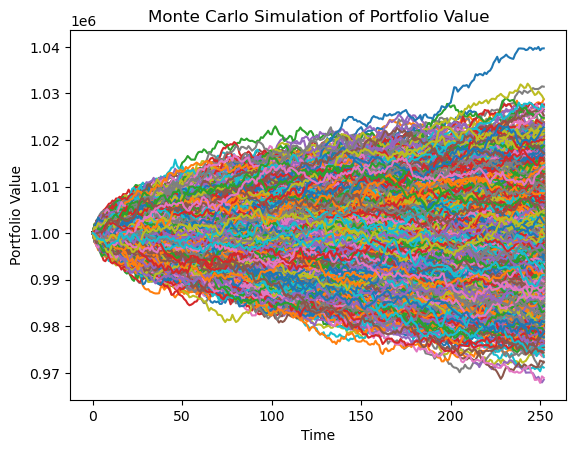

In [2095]:
plt.plot(St)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Monte Carlo Simulation of Portfolio Value');

##### **Value-at-Risk**

**Confidence Level**

In [2096]:
cl = 95

**Alpha**

In [2097]:
alpha = 1 - (cl / 100)
alpha

0.050000000000000044

**Percentage VaR**

In [2098]:
pct_VaR = np.quantile(returns[1], alpha)
pct_VaR

-0.0008673815628459417

**Insights:**
- With 95% level of confidence, the value of portfolio will not lose more than 0.169% in the next day.

**Absolute VaR**

In [2099]:
abs_VaR = np.quantile(returns[1] * portfolioValue, alpha)
abs_VaR

-867.3815628459417

**Insights:**
- With 95% level of confidence, the value of portfolio will not lose more than $ 1,699.82 in the next day.

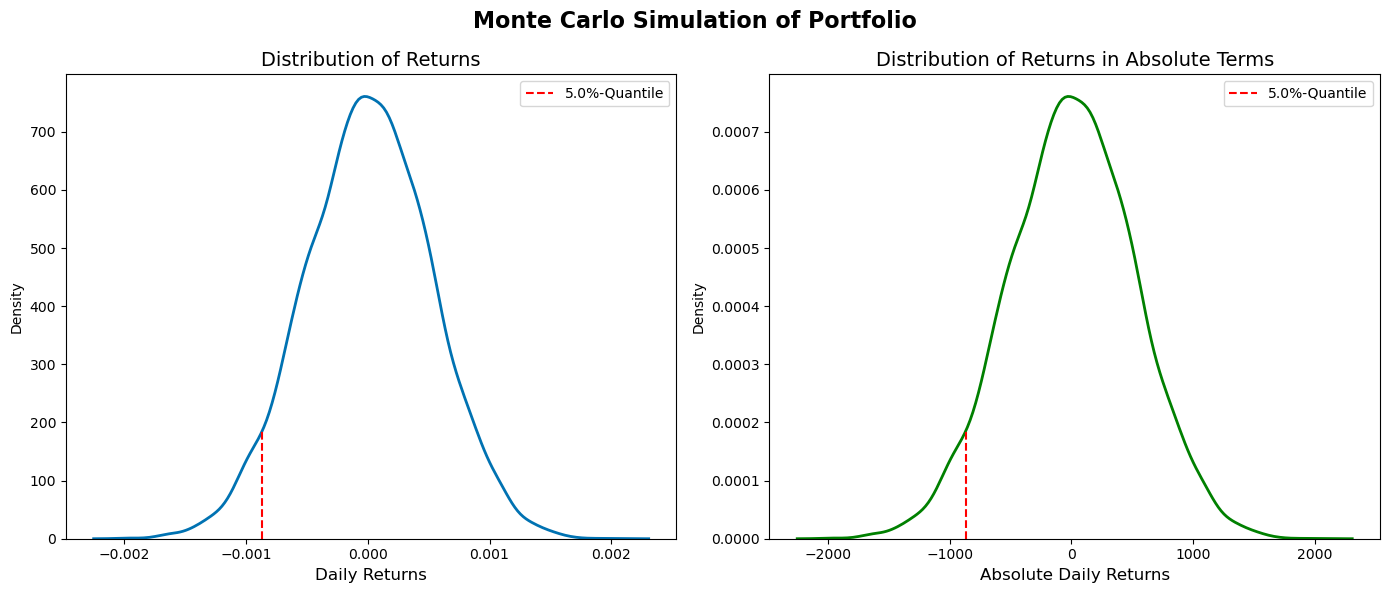

In [2100]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Subplot 1: Daily Returns
plt.subplot(1, 2, 1)

# KDE plot for returns
ax = sns.kdeplot(returns[1], fill = False, color = '#0072B2', linewidth = 2)

x, y = ax.get_lines()[0].get_data()
xi = np.quantile(returns[1], alpha)  # Coordinate to find the value on the KDE curve
yi = np.interp(xi, x, y)

# Vertical line at alpha-quantile
plt.vlines(x = xi, ymin = 0, ymax = yi, color = 'red', linestyle = '--', label = f'{np.round(alpha * 100, 0)}%-Quantile')
plt.xlabel('Daily Returns', fontsize = 12)
plt.title('Distribution of Returns', fontsize=14)
plt.legend(fontsize = 10)

# Subplot 2: Absolute Daily Returns
plt.subplot(1, 2, 2)
# KDE plot for portfolioDist
ax = sns.kdeplot(returns[1] * portfolioValue, fill = False, color = 'green', linewidth = 2)
x, y = ax.get_lines()[0].get_data()
xi = np.quantile(returns[1] * portfolioValue, alpha)  # Coordinate to find the value on the KDE curve
yi = np.interp(xi, x, y)

# Vertical line at 5th percentile
plt.vlines(x = xi, ymin = 0, ymax = yi, color = 'red', linestyle = '--', label= f'{np.round(alpha * 100, 0)}%-Quantile')
plt.xlabel('Absolute Daily Returns', fontsize=12)
plt.title('Distribution of Returns in Absolute Terms', fontsize = 14)
plt.legend(fontsize = 10)

# Add a super title
plt.suptitle('Monte Carlo Simulation of Portfolio', fontsize=16, fontweight = 'bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

---